## Play with depth and Width of Neural Network

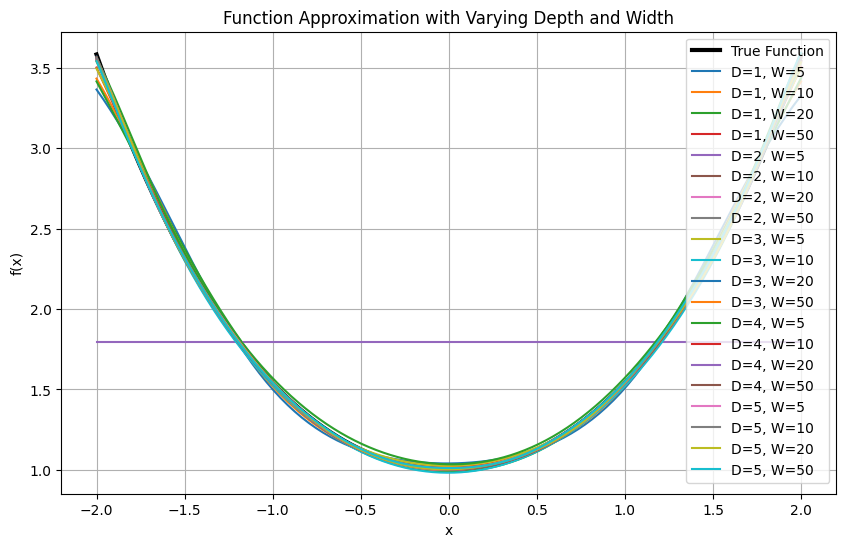


Mean Squared Errors:
Depth: 1, Width: 5 => MSE: 0.003156
Depth: 1, Width: 10 => MSE: 0.001238
Depth: 1, Width: 20 => MSE: 0.001438
Depth: 1, Width: 50 => MSE: 0.000325
Depth: 2, Width: 5 => MSE: 0.575945
Depth: 2, Width: 10 => MSE: 0.000049
Depth: 2, Width: 20 => MSE: 0.000045
Depth: 2, Width: 50 => MSE: 0.000015
Depth: 3, Width: 5 => MSE: 0.000559
Depth: 3, Width: 10 => MSE: 0.000292
Depth: 3, Width: 20 => MSE: 0.000012
Depth: 3, Width: 50 => MSE: 0.000018
Depth: 4, Width: 5 => MSE: 0.001087
Depth: 4, Width: 10 => MSE: 0.000074
Depth: 4, Width: 20 => MSE: 0.000017
Depth: 4, Width: 50 => MSE: 0.000009
Depth: 5, Width: 5 => MSE: 0.000071
Depth: 5, Width: 10 => MSE: 0.000029
Depth: 5, Width: 20 => MSE: 0.000078
Depth: 5, Width: 50 => MSE: 0.000175


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)

# Generate training data
x_train = np.linspace(-2, 2, 200).reshape(-1, 1)
y_train = x_train**2 + np.cos(x_train)

x_tensor = torch.tensor(x_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)

# Function to create a feedforward neural network
def build_model(input_dim, hidden_dim, output_dim, depth):
    layers = [nn.Linear(input_dim, hidden_dim), nn.Tanh()]
    for _ in range(depth - 1):
        layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(nn.Tanh())
    layers.append(nn.Linear(hidden_dim, output_dim))
    return nn.Sequential(*layers)

# Training function
def train_model(model, x, y, epochs=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    return model

# Evaluation and plotting
def evaluate_and_plot(model, x, y_true, label):
    model.eval()
    with torch.no_grad():
        y_pred = model(x).numpy()
    plt.plot(x.numpy(), y_pred, label=label)
    mse = np.mean((y_true.numpy() - y_pred)**2)
    return mse

# Plot true function
plt.figure(figsize=(10, 6))
plt.plot(x_tensor.numpy(), y_tensor.numpy(), label='True Function', linewidth=3, color='black')

# Grid of (depth, width) values to test
depths = [1, 2, 3, 4, 5]
widths = [5, 10, 20, 50]

results = []

for depth in depths:
    for width in widths:
        model = build_model(input_dim=1, hidden_dim=width, output_dim=1, depth=depth)
        model = train_model(model, x_tensor, y_tensor, epochs=1000, lr=0.01)
        mse = evaluate_and_plot(model, x_tensor, y_tensor, label=f"D={depth}, W={width}")
        results.append((depth, width, mse))

plt.title('Function Approximation with Varying Depth and Width')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Print all MSE values
print("\nMean Squared Errors:")
for depth, width, mse in results:
    print(f"Depth: {depth}, Width: {width} => MSE: {mse:.6f}")


```lua
        Width →
Depth ↓     5         10         20         50
       --------------------------------------------
1     | 0.003156   0.001238   0.001438   0.000325
2     | 0.575945   0.000049   0.000045   0.000015
3     | 0.000559   0.000292   0.000012   0.000018
4     | 0.001087   0.000074   0.000017   0.000009
5     | 0.000071   0.000029   0.000078   0.000175
```

### *Conclusion*

```
From the table We can see that the Loss is decreasing when we go left to right and top to bottom, i.e.

When we are using more layers or more neurons or both, the loss is decreasing.

But From This Observation it is not clear which model is overfitting or underfitting.

We need more experiments to conclude.
```
<hr color="cyan" size=5>

### Using Relu Activation Function

```
Function Approximation with Fully Connected Neural Networks (FCNNs)

Evaluating Depth and Width Effects on Neural Network Function Fitting
```

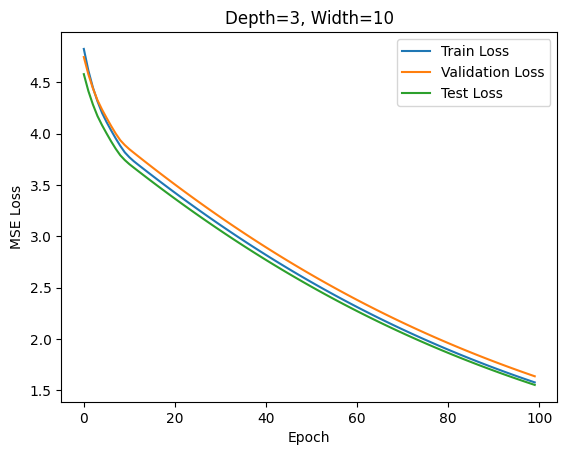

Final Test MSE for depth=3, width=10: 1.55356


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

#Generate data
X = np.linspace(-2, 2, 1000).reshape(-1,1).astype(np.float32)
y = (X**2 + np.cos(X)).astype(np.float32)

# Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)


X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

# Define neural network
class FCNN(nn.Module):
    def __init__(self, depth, width):
        super(FCNN, self).__init__()
        layers = []
        layers.append(nn.Linear(1, width))
        layers.append(nn.ReLU())
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(width, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

#Training function
def train_model(depth, width, epochs=100, lr=0.01):
    model = FCNN(depth, width)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_t)
            val_loss = criterion(val_outputs, y_val_t)
            val_losses.append(val_loss.item())

            test_outputs = model(X_test_t)
            test_loss = criterion(test_outputs, y_test_t)
            test_losses.append(test_loss.item())

    # Plot train, val, and test loss
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Depth={depth}, Width={width}')
    plt.legend()
    plt.show()

    print(f"Final Test MSE for depth={depth}, width={width}: {test_losses[-1]:.5f}")


train_model(depth=3, width=10, epochs=100, lr=0.01)


### Using Different Depth and Width

Training model with Depth=1, Width=5...


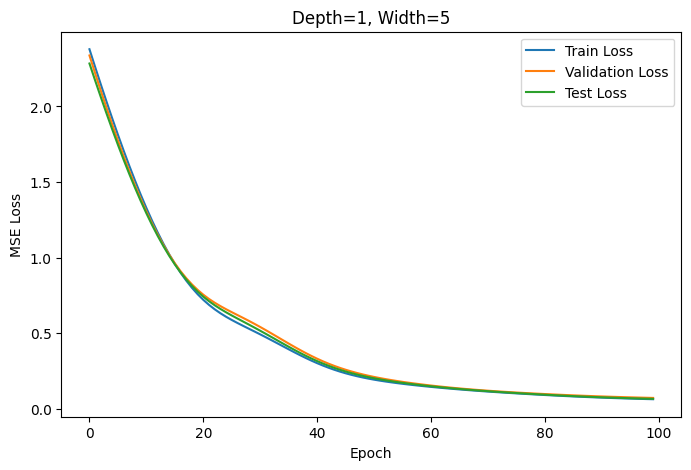

Training model with Depth=1, Width=10...


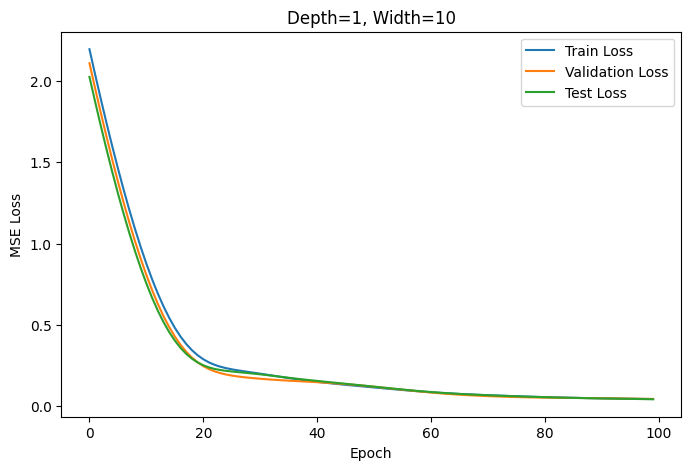

Training model with Depth=1, Width=20...


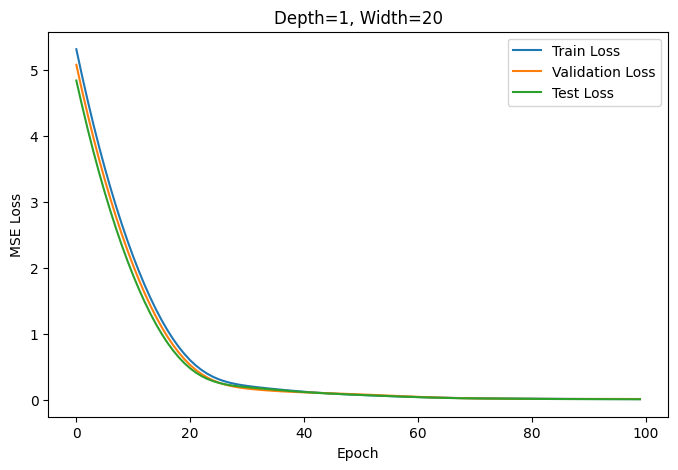

Training model with Depth=2, Width=5...


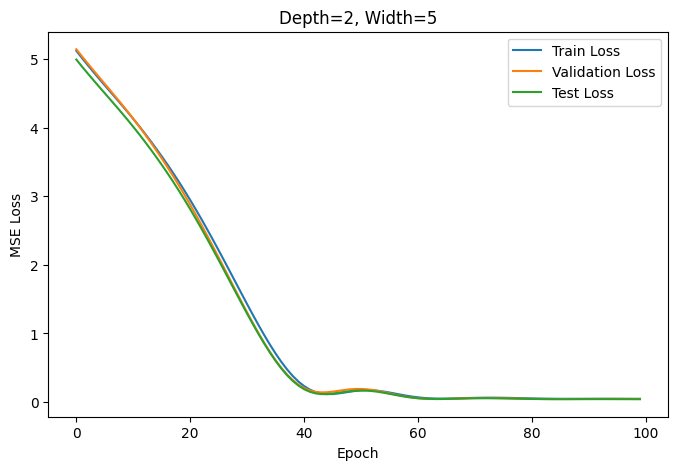

Training model with Depth=2, Width=10...


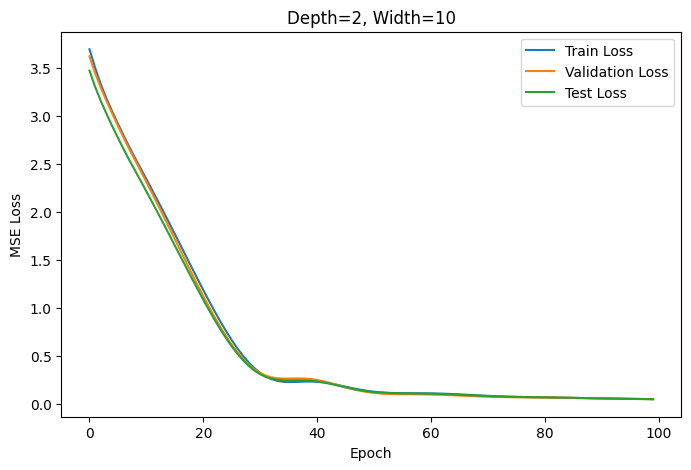

Training model with Depth=2, Width=20...


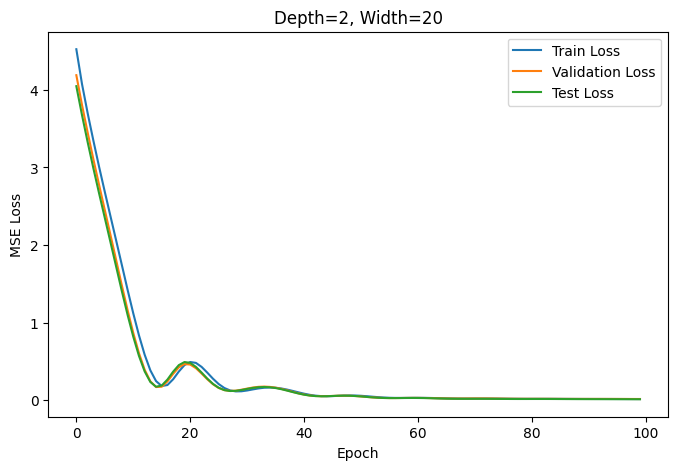

Training model with Depth=3, Width=5...


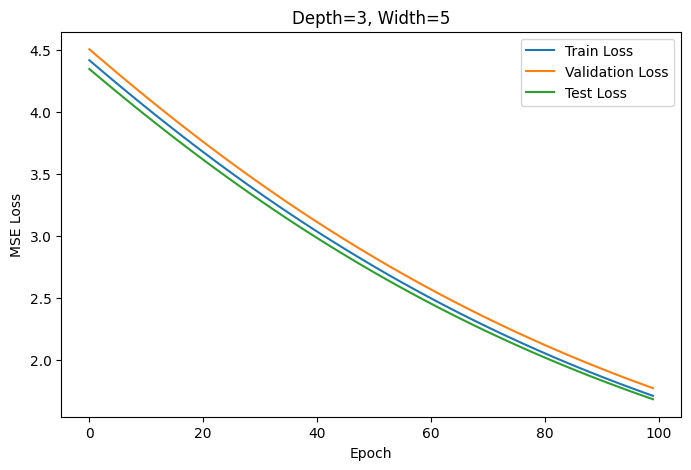

Training model with Depth=3, Width=10...


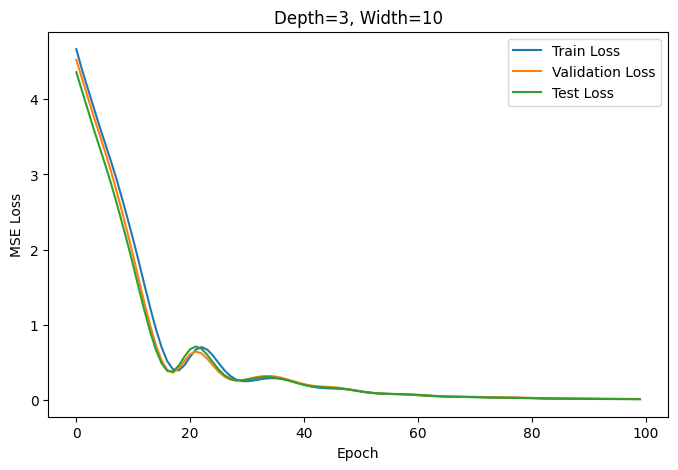

Training model with Depth=3, Width=20...


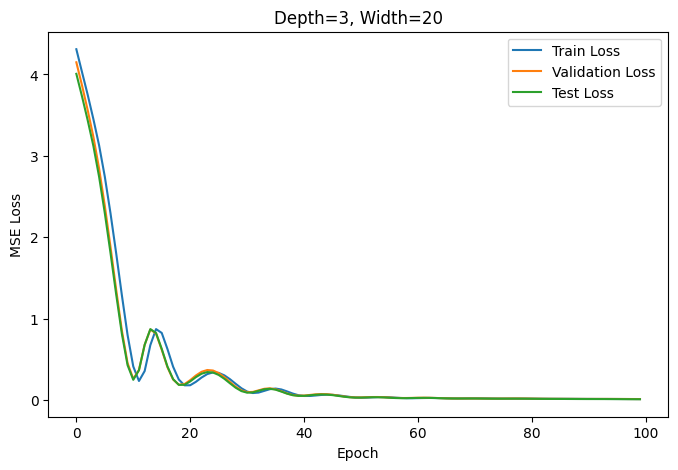

Training model with Depth=5, Width=5...


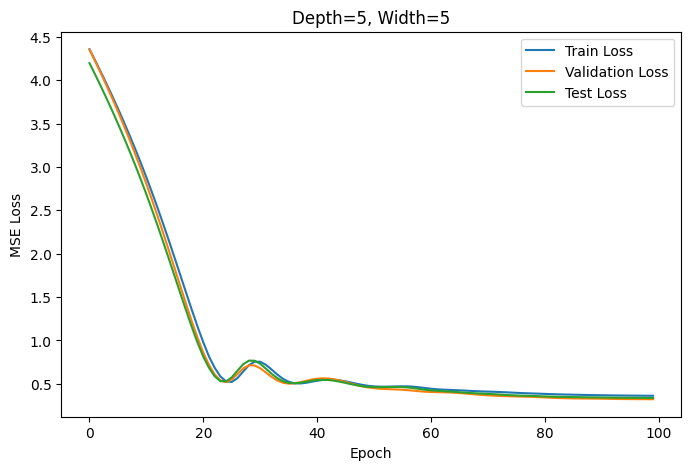

Training model with Depth=5, Width=10...


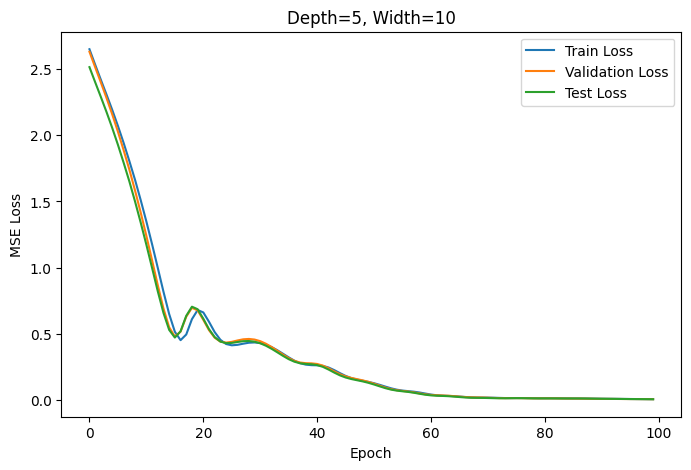

Training model with Depth=5, Width=20...


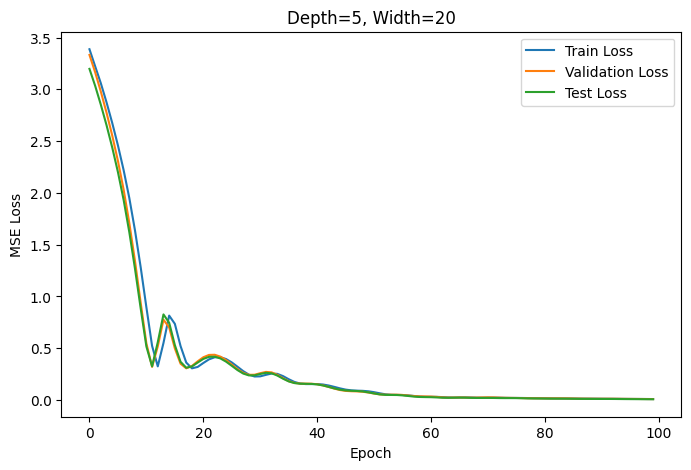


Summary of Test MSE losses:
Depth | Width |   Test MSE
--------------------------
    1 |     5 |   0.066411
    1 |    10 |   0.043917
    1 |    20 |   0.016546
    2 |     5 |   0.042573
    2 |    10 |   0.047926
    2 |    20 |   0.011632
    3 |     5 |   1.684608
    3 |    10 |   0.010419
    3 |    20 |   0.012460
    5 |     5 |   0.337205
    5 |    10 |   0.004603
    5 |    20 |   0.007489


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Generate data
X = np.linspace(-2, 2, 1000).reshape(-1,1).astype(np.float32)
y = (X**2 + np.cos(X)).astype(np.float32)

# Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)


X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

# Neural net with variable depth and width
class FCNN(nn.Module):
    def __init__(self, depth, width):
        super(FCNN, self).__init__()
        layers = []
        layers.append(nn.Linear(1, width))
        layers.append(nn.ReLU())
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(width, 1))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def train_model(depth, width, epochs=100, lr=0.01):
    model = FCNN(depth, width)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_t)
            val_loss = criterion(val_outputs, y_val_t)
            val_losses.append(val_loss.item())

            test_outputs = model(X_test_t)
            test_loss = criterion(test_outputs, y_test_t)
            test_losses.append(test_loss.item())

    # Plot losses
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Depth={depth}, Width={width}')
    plt.legend()
    plt.show()

    return test_losses[-1]

depths = [1, 2, 3, 5]
widths = [5, 10, 20]

results = []
for d in depths:
    for w in widths:
        print(f"Training model with Depth={d}, Width={w}...")
        test_mse = train_model(depth=d, width=w, epochs=100, lr=0.01)
        results.append((d, w, test_mse))

print("\nSummary of Test MSE losses:")
print(f"{'Depth':>5} | {'Width':>5} | {'Test MSE':>10}")
print("-"*26)
for d, w, mse in results:
    print(f"{d:5d} | {w:5d} | {mse:10.6f}")


```
        Width →
Depth ↓     5         10         20
       -------------------------------------
1     | 0.066411   0.043917   0.016546
2     | 0.042573   0.047926   0.011632
3     | 1.684608   0.010419   0.012460
5     | 0.337205   0.004603   0.007489
```

### Using Tanh instead of ReLU

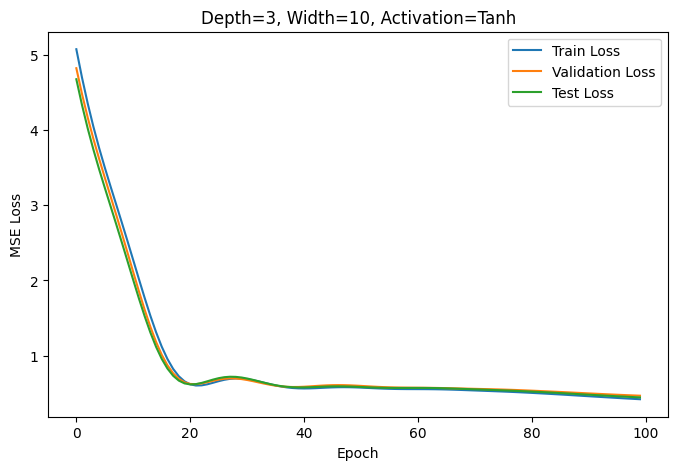

Final Test MSE for depth=3, width=10: 0.447335


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

X = np.linspace(-2, 2, 1000).reshape(-1,1).astype(np.float32)
y = (X**2 + np.cos(X)).astype(np.float32)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

class FCNN(nn.Module):
    def __init__(self, depth, width):
        super(FCNN, self).__init__()
        layers = []
        layers.append(nn.Linear(1, width))
        layers.append(nn.Tanh())
        for _ in range(depth - 1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(width, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def train_model(depth, width, epochs=100, lr=0.01):
    model = FCNN(depth, width)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_t)
            val_loss = criterion(val_outputs, y_val_t)
            val_losses.append(val_loss.item())

            test_outputs = model(X_test_t)
            test_loss = criterion(test_outputs, y_test_t)
            test_losses.append(test_loss.item())

    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Depth={depth}, Width={width}, Activation=Tanh')
    plt.legend()
    plt.show()

    print(f"Final Test MSE for depth={depth}, width={width}: {test_losses[-1]:.6f}")

# Example run
train_model(depth=3, width=10, epochs=100, lr=0.01)


## Trying Different Depth And Width with *Tanh* Activation Function


Training model with Depth=1, Width=5...


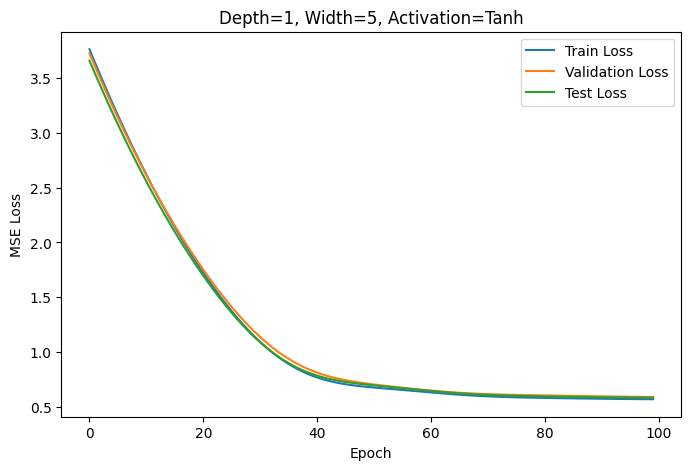

Final Test MSE for depth=1, width=5: 0.582915

Training model with Depth=1, Width=10...


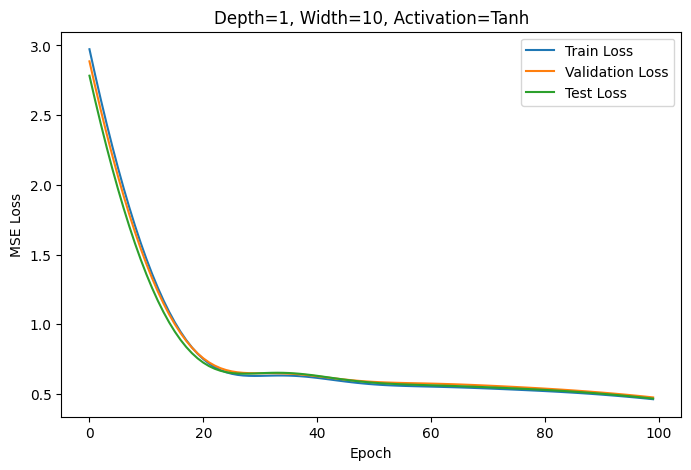

Final Test MSE for depth=1, width=10: 0.467774

Training model with Depth=1, Width=20...


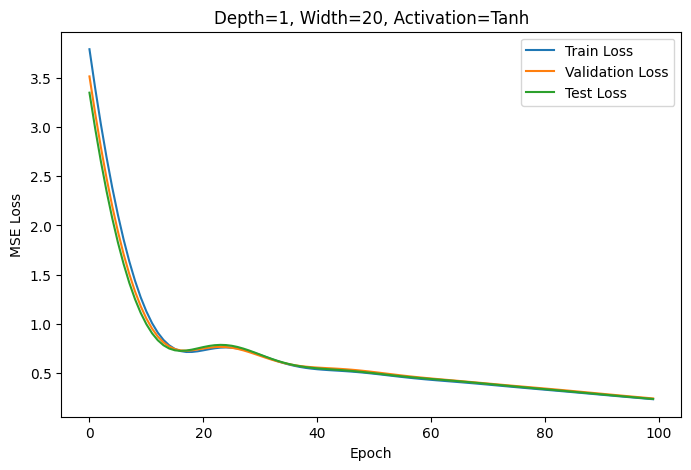

Final Test MSE for depth=1, width=20: 0.236164

Training model with Depth=2, Width=5...


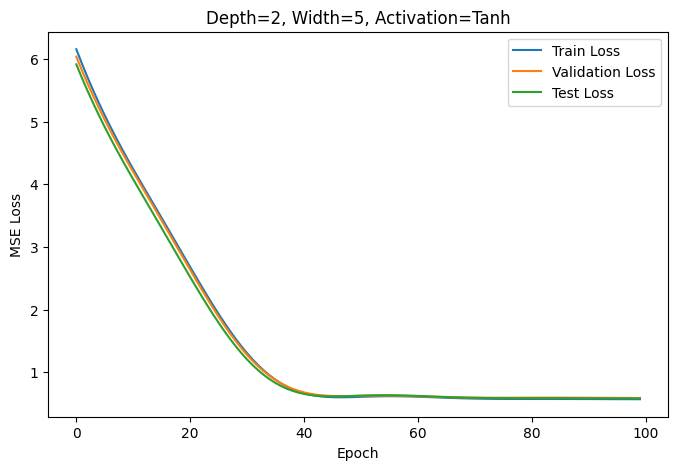

Final Test MSE for depth=2, width=5: 0.581341

Training model with Depth=2, Width=10...


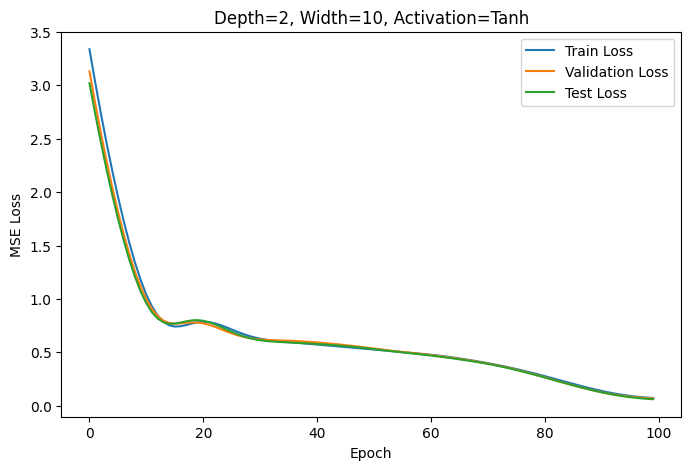

Final Test MSE for depth=2, width=10: 0.061589

Training model with Depth=2, Width=20...


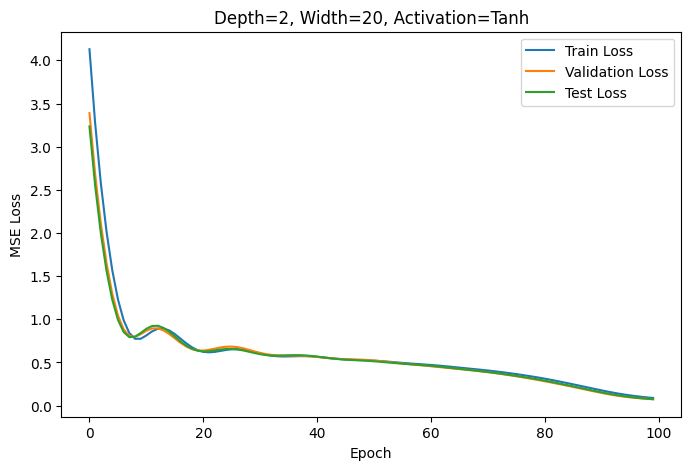

Final Test MSE for depth=2, width=20: 0.073656

Training model with Depth=3, Width=5...


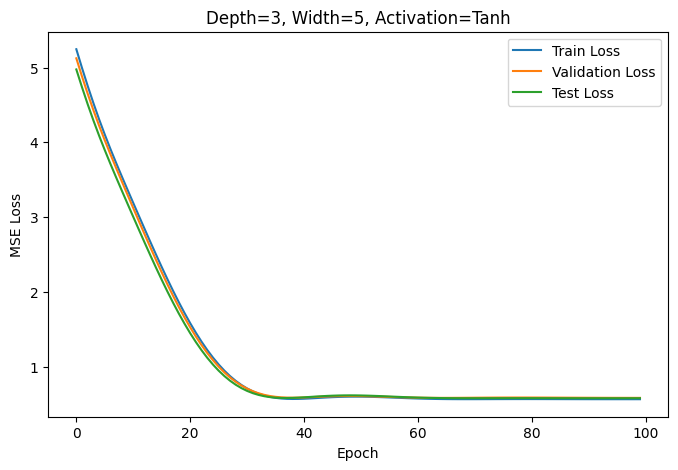

Final Test MSE for depth=3, width=5: 0.576261

Training model with Depth=3, Width=10...


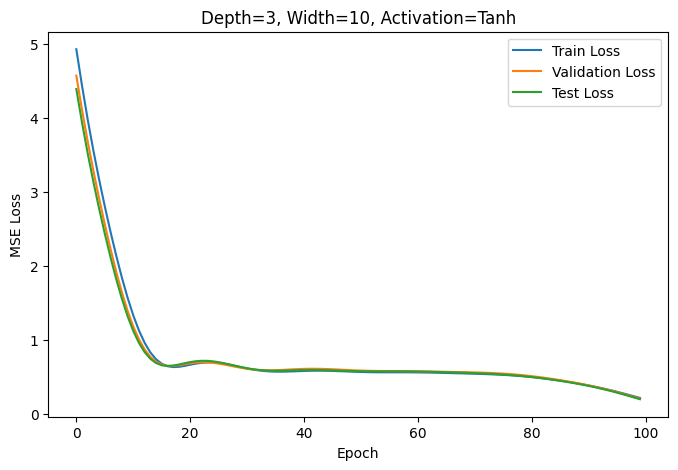

Final Test MSE for depth=3, width=10: 0.198014

Training model with Depth=3, Width=20...


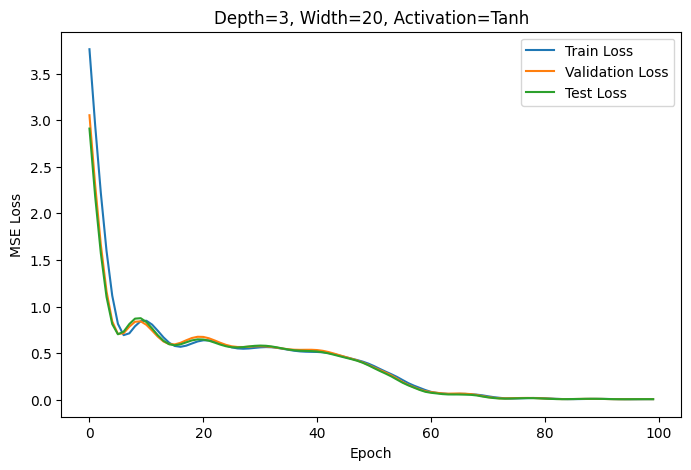

Final Test MSE for depth=3, width=20: 0.006014

Training model with Depth=5, Width=5...


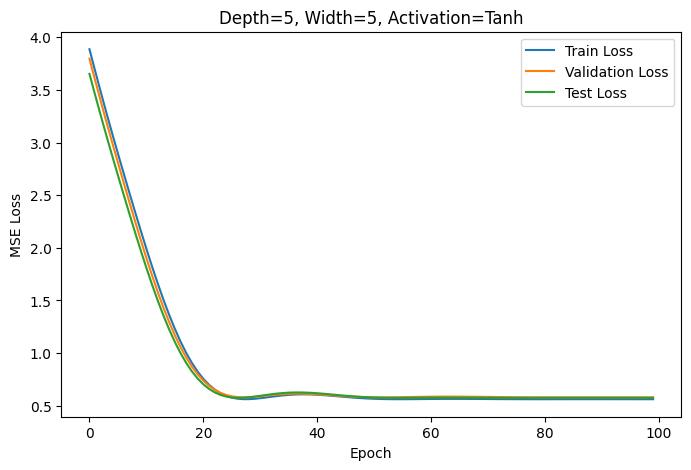

Final Test MSE for depth=5, width=5: 0.575201

Training model with Depth=5, Width=10...


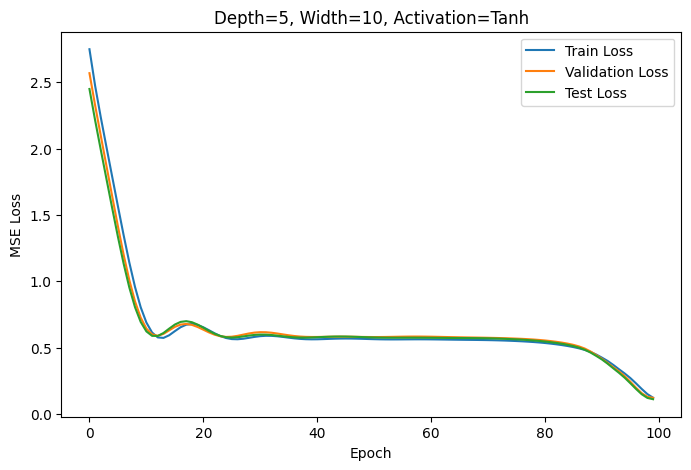

Final Test MSE for depth=5, width=10: 0.110221

Training model with Depth=5, Width=20...


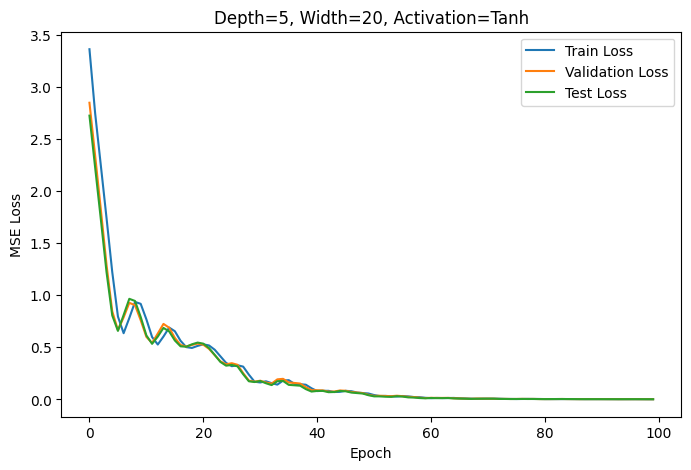

Final Test MSE for depth=5, width=20: 0.002118

Summary of Test MSE for all models:
Depth | Width |   Test MSE
--------------------------
    1 |     5 |   0.582915
    1 |    10 |   0.467774
    1 |    20 |   0.236164
    2 |     5 |   0.581341
    2 |    10 |   0.061589
    2 |    20 |   0.073656
    3 |     5 |   0.576261
    3 |    10 |   0.198014
    3 |    20 |   0.006014
    5 |     5 |   0.575201
    5 |    10 |   0.110221
    5 |    20 |   0.002118


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

X = np.linspace(-2, 2, 1000).reshape(-1,1).astype(np.float32)
y = (X**2 + np.cos(X)).astype(np.float32)

# Split data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)


X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)


class FCNN(nn.Module):
    def __init__(self, depth, width):
        super().__init__()
        layers = [nn.Linear(1, width), nn.Tanh()]
        for _ in range(depth - 1):
            layers += [nn.Linear(width, width), nn.Tanh()]
        layers.append(nn.Linear(width, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def train_model(depth, width, epochs=100, lr=0.01):
    model = FCNN(depth, width)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses, test_losses = [], [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val_t)
            val_loss = criterion(val_out, y_val_t)
            val_losses.append(val_loss.item())

            test_out = model(X_test_t)
            test_loss = criterion(test_out, y_test_t)
            test_losses.append(test_loss.item())

    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title(f'Depth={depth}, Width={width}, Activation=Tanh')
    plt.legend()
    plt.show()

    print(f"Final Test MSE for depth={depth}, width={width}: {test_losses[-1]:.6f}")
    return test_losses[-1]


depths = [1, 2, 3, 5]
widths = [5, 10, 20]

results = []
for d in depths:
    for w in widths:
        print(f"\nTraining model with Depth={d}, Width={w}...")
        mse = train_model(d, w)
        results.append((d, w, mse))


print("\nSummary of Test MSE for all models:")
print(f"{'Depth':>5} | {'Width':>5} | {'Test MSE':>10}")
print("-"*26)
for d, w, mse in results:
    print(f"{d:5d} | {w:5d} | {mse:10.6f}")


```lua
        Width →
Depth ↓     5         10         20
       ------------------------------------
1     | 0.582915   0.467774   0.236164
2     | 0.581341   0.061589   0.073656
3     | 0.576261   0.198014   0.006014
5     | 0.575201   0.110221   0.002118
```

### Lets Compare Results of <font color="blue">*ReLU*</font> and <font color="red">*Tanh*</font> side by Side


Depth=1, Width=5 comparison:


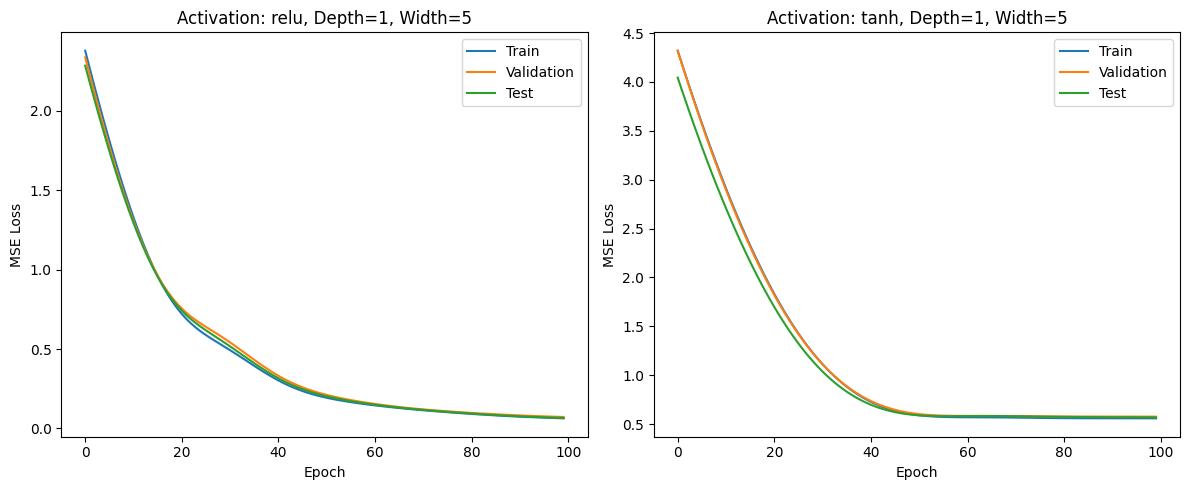


Depth=1, Width=10 comparison:


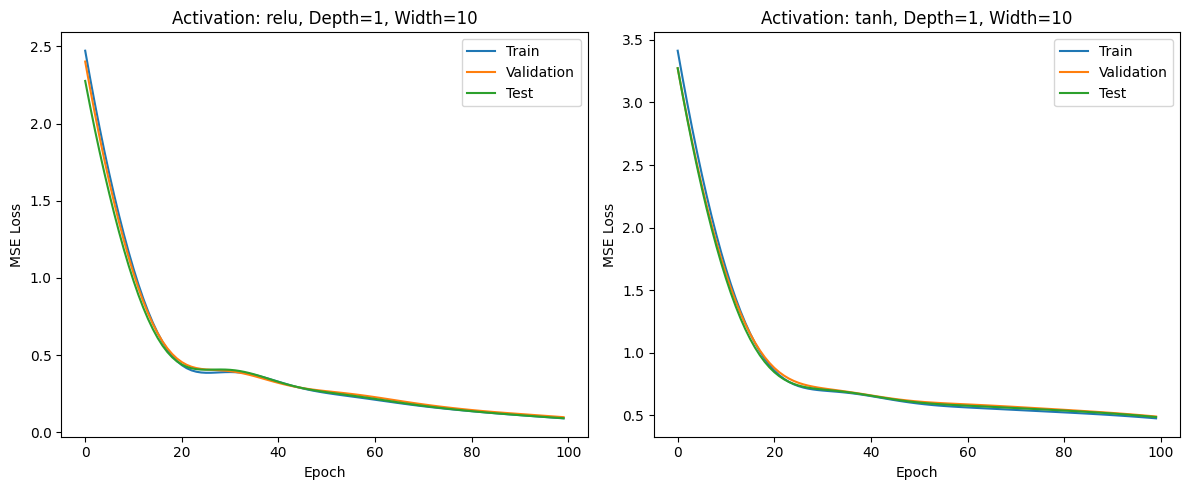


Depth=1, Width=20 comparison:


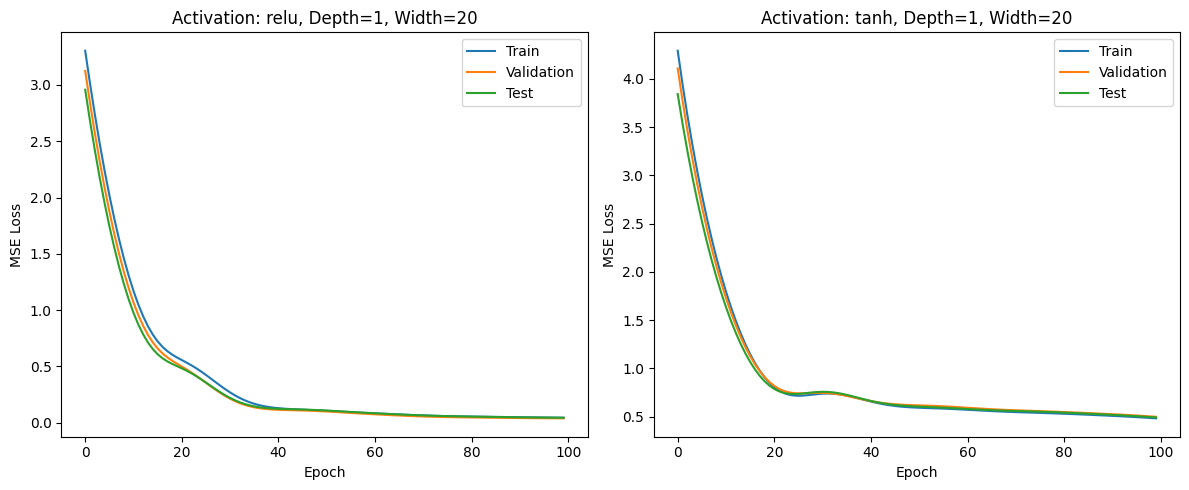


Depth=2, Width=5 comparison:


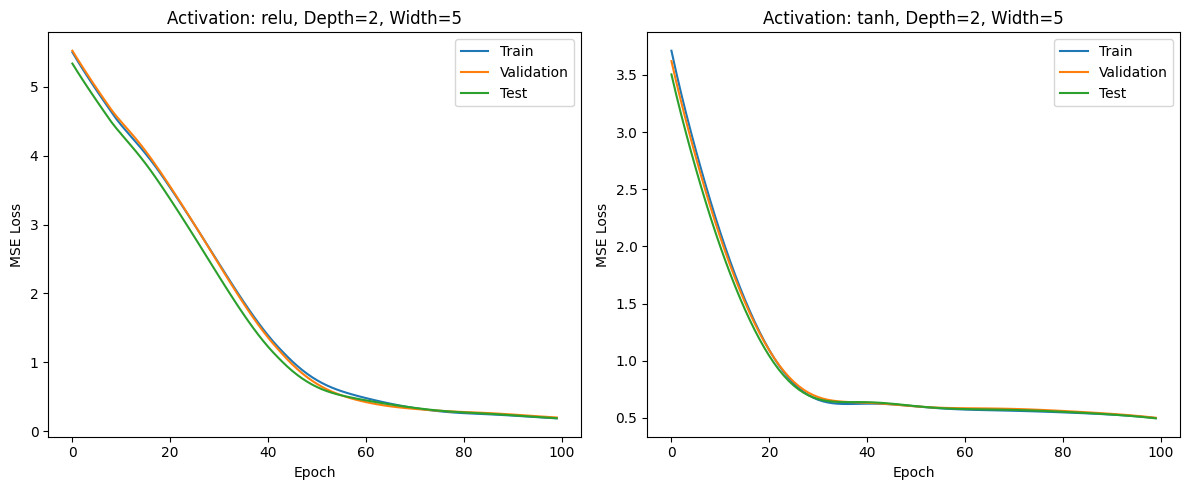


Depth=2, Width=10 comparison:


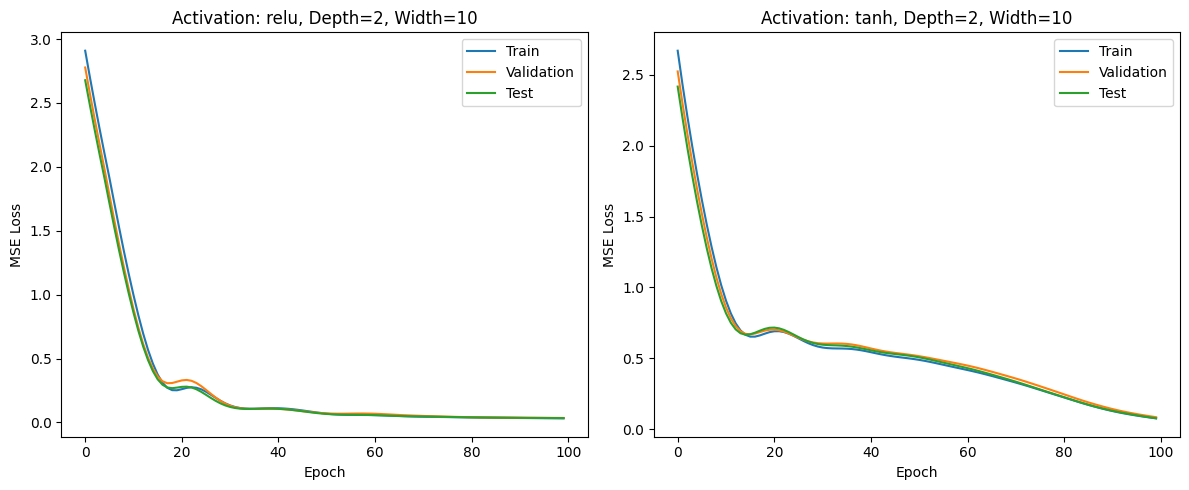


Depth=2, Width=20 comparison:


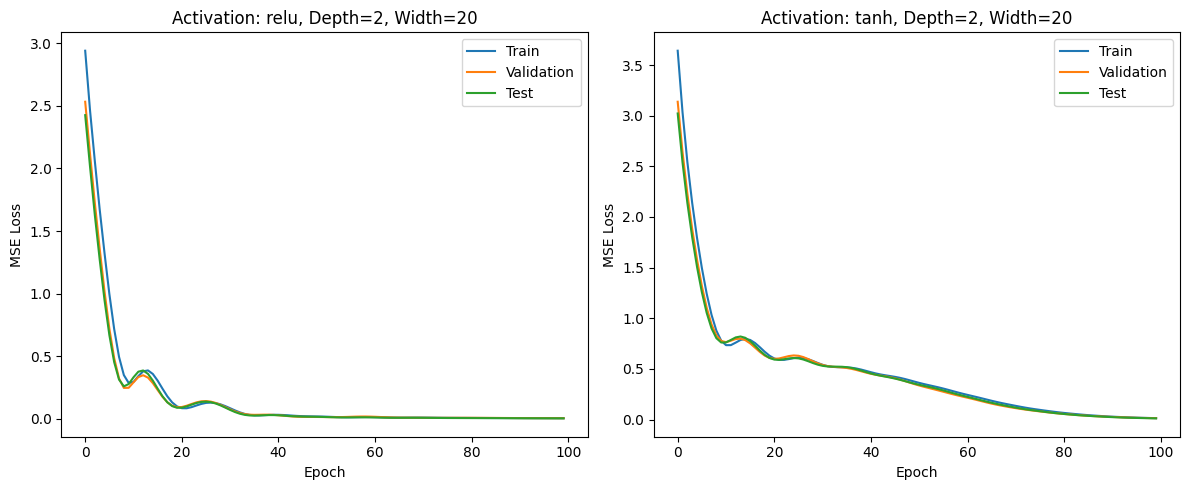


Depth=3, Width=5 comparison:


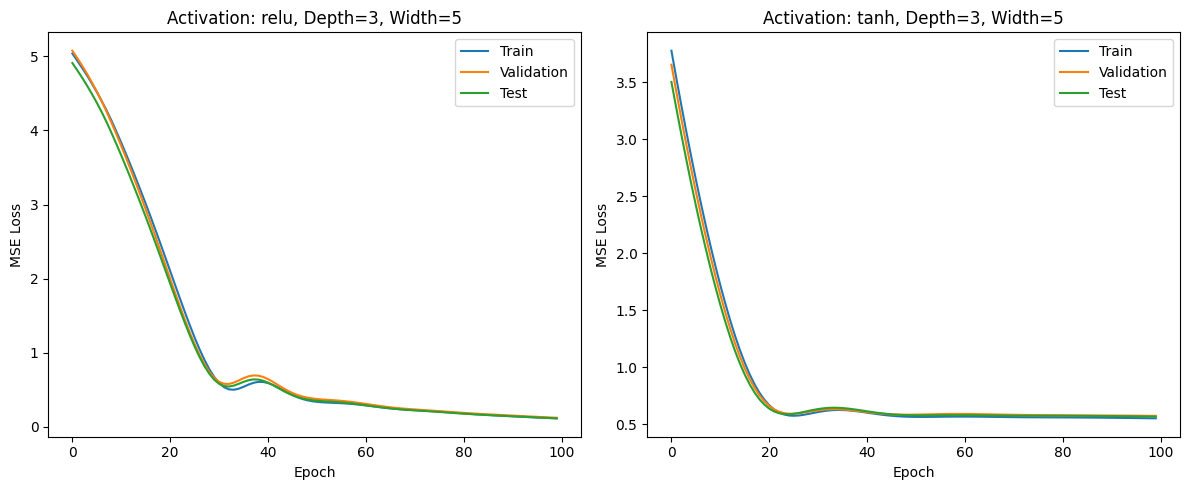


Depth=3, Width=10 comparison:


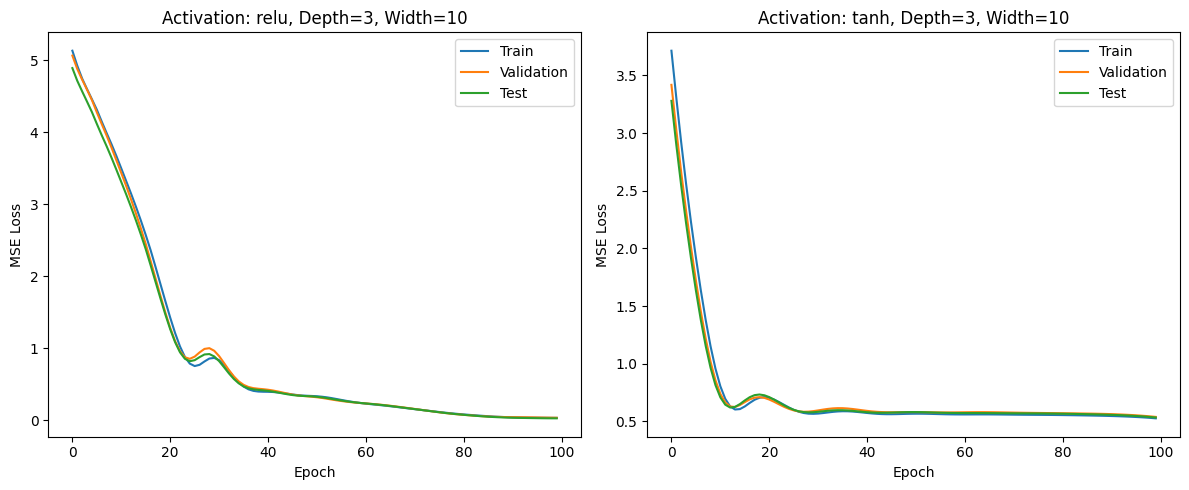


Depth=3, Width=20 comparison:


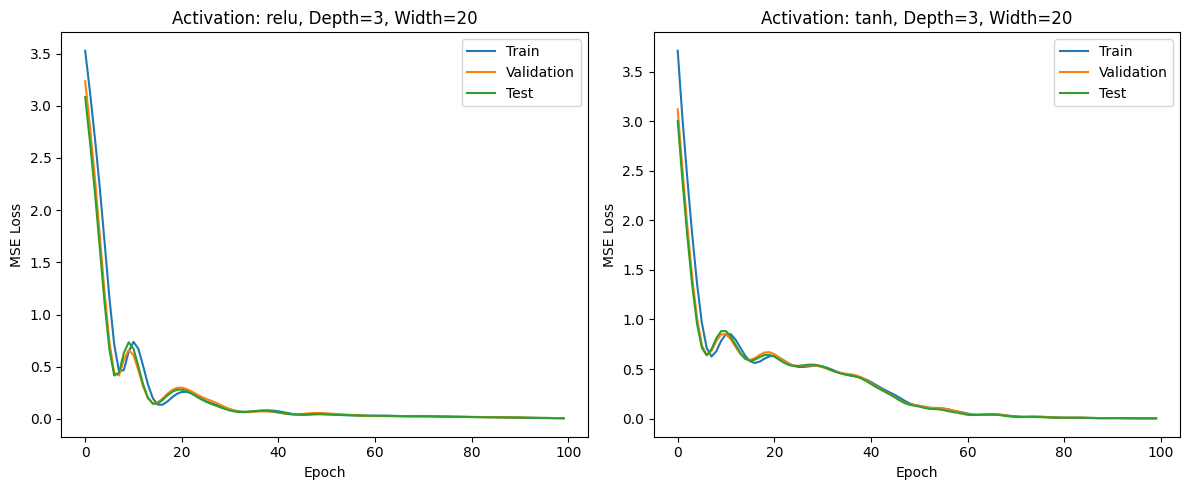


Depth=5, Width=5 comparison:


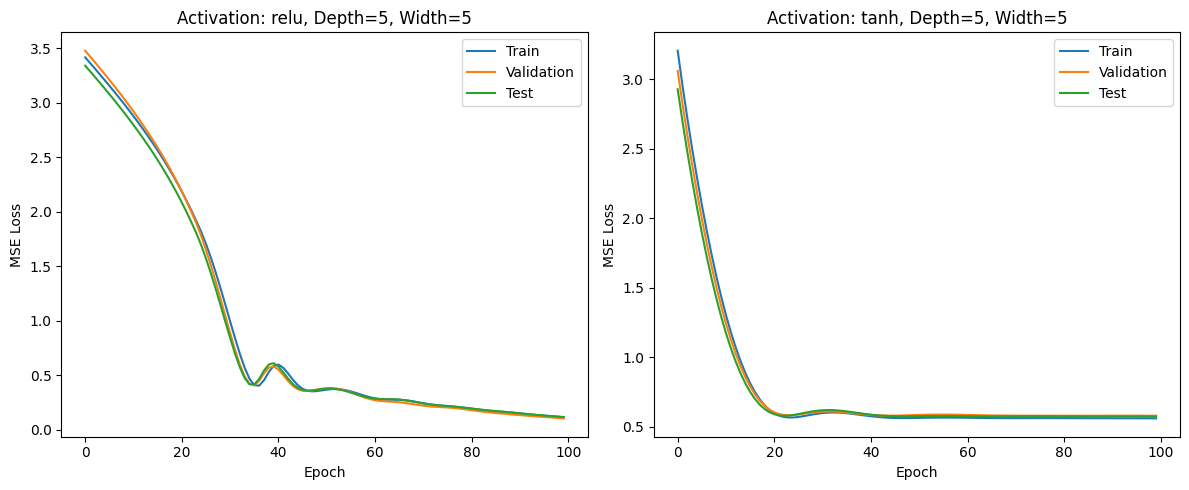


Depth=5, Width=10 comparison:


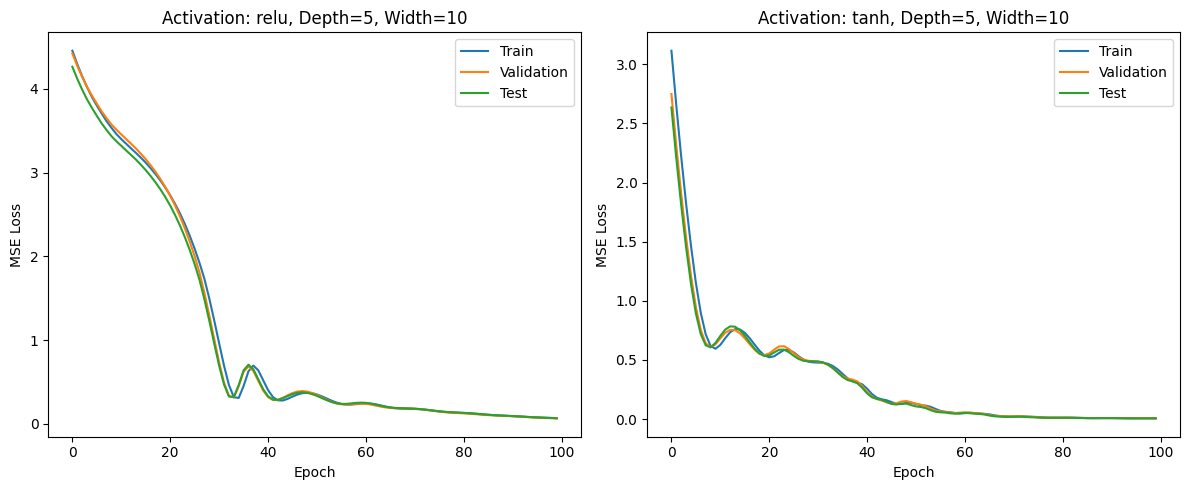


Depth=5, Width=20 comparison:


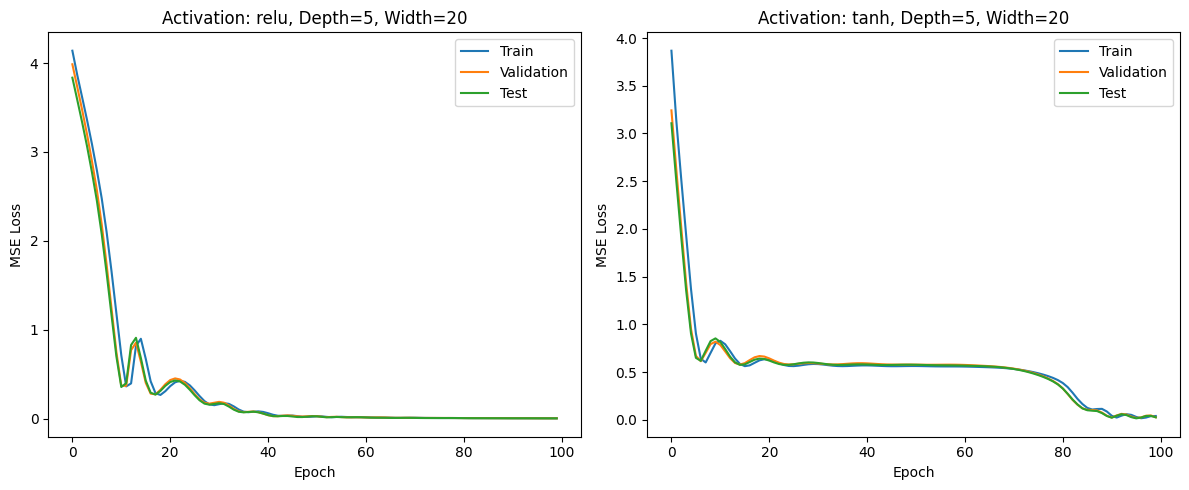


Summary of final Test MSE:
Depth | Width | Activation |   Test MSE
-------------------------------------
    1 |     5 | relu      |   0.066411
    1 |     5 | tanh      |   0.568559
    1 |    10 | relu      |   0.090814
    1 |    10 | tanh      |   0.487604
    1 |    20 | relu      |   0.043848
    1 |    20 | tanh      |   0.490739
    2 |     5 | relu      |   0.189911
    2 |     5 | tanh      |   0.495854
    2 |    10 | relu      |   0.034175
    2 |    10 | tanh      |   0.078027
    2 |    20 | relu      |   0.004698
    2 |    20 | tanh      |   0.012726
    3 |     5 | relu      |   0.115644
    3 |     5 | tanh      |   0.565023
    3 |    10 | relu      |   0.026754
    3 |    10 | tanh      |   0.534346
    3 |    20 | relu      |   0.006112
    3 |    20 | tanh      |   0.002634
    5 |     5 | relu      |   0.114642
    5 |     5 | tanh      |   0.573380
    5 |    10 | relu      |   0.066433
    5 |    10 | tanh      |   0.005738
    5 |    20 | relu      |   0.0020

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

X = np.linspace(-2, 2, 1000).reshape(-1,1).astype(np.float32)
y = (X**2 + np.cos(X)).astype(np.float32)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train)
X_val_t = torch.from_numpy(X_val)
y_val_t = torch.from_numpy(y_val)
X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test)

def get_activation(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError(f"Unknown activation: {name}")

class FCNN(nn.Module):
    def __init__(self, depth, width, activation_name):
        super().__init__()
        activation = get_activation(activation_name)
        layers = [nn.Linear(1, width), activation]
        for _ in range(depth - 1):
            layers += [nn.Linear(width, width), activation]
        layers.append(nn.Linear(width, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

def train_model(depth, width, activation_name, epochs=100, lr=0.01):
    model = FCNN(depth, width, activation_name)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses, test_losses = [], [], []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(X_train_t)
        loss = criterion(out, y_train_t)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            val_out = model(X_val_t)
            val_loss = criterion(val_out, y_val_t)
            val_losses.append(val_loss.item())

            test_out = model(X_test_t)
            test_loss = criterion(test_out, y_test_t)
            test_losses.append(test_loss.item())

    return train_losses, val_losses, test_losses, model

depths = [1, 2, 3, 5]
widths = [5, 10, 20]
activations = ['relu', 'tanh']

results = []

for d in depths:
    for w in widths:
        print(f"\nDepth={d}, Width={w} comparison:")
        plt.figure(figsize=(12,5))

        for i, act in enumerate(activations):
            train_losses, val_losses, test_losses, _ = train_model(d, w, act)
            plt.subplot(1, 2, i+1)
            plt.plot(train_losses, label='Train')
            plt.plot(val_losses, label='Validation')
            plt.plot(test_losses, label='Test')
            plt.title(f'Activation: {act}, Depth={d}, Width={w}')
            plt.xlabel('Epoch')
            plt.ylabel('MSE Loss')
            plt.legend()

            # Store final test MSE
            results.append((d, w, act, test_losses[-1]))

        plt.tight_layout()
        plt.show()

# Print summary table
print("\nSummary of final Test MSE:")
print(f"{'Depth':>5} | {'Width':>5} | {'Activation':>9} | {'Test MSE':>10}")
print("-"*37)
for d, w, act, mse in results:
    print(f"{d:5d} | {w:5d} | {act:9} | {mse:10.6f}")


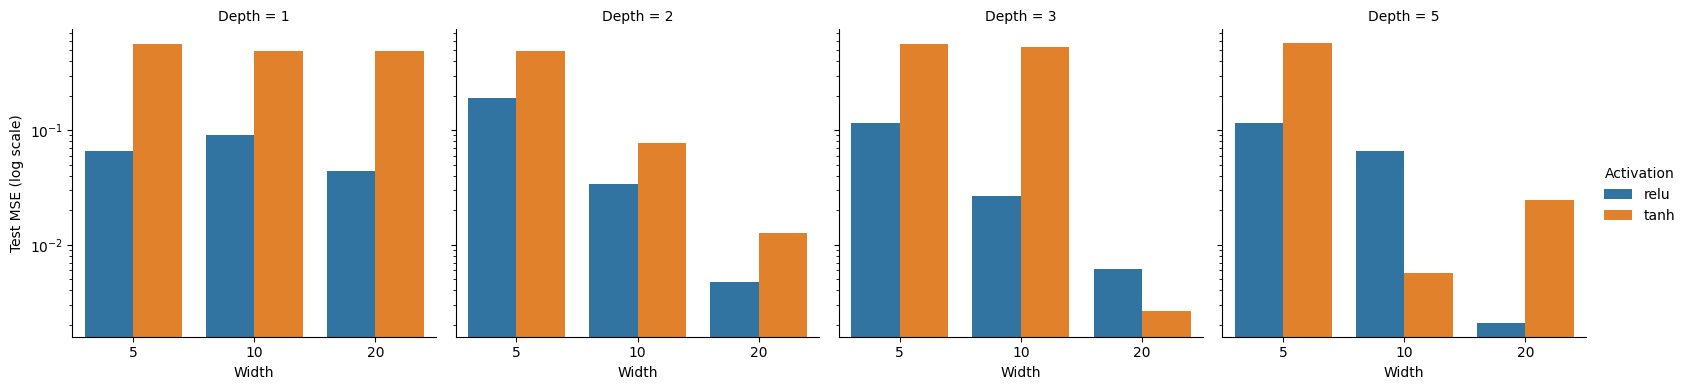

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your data as a list of dicts
data = [
    {"Depth":1, "Width":5, "Activation":"relu", "Test MSE":0.066411},
    {"Depth":1, "Width":5, "Activation":"tanh", "Test MSE":0.568559},
    {"Depth":1, "Width":10, "Activation":"relu", "Test MSE":0.090814},
    {"Depth":1, "Width":10, "Activation":"tanh", "Test MSE":0.487604},
    {"Depth":1, "Width":20, "Activation":"relu", "Test MSE":0.043848},
    {"Depth":1, "Width":20, "Activation":"tanh", "Test MSE":0.490739},
    {"Depth":2, "Width":5, "Activation":"relu", "Test MSE":0.189911},
    {"Depth":2, "Width":5, "Activation":"tanh", "Test MSE":0.495854},
    {"Depth":2, "Width":10, "Activation":"relu", "Test MSE":0.034175},
    {"Depth":2, "Width":10, "Activation":"tanh", "Test MSE":0.078027},
    {"Depth":2, "Width":20, "Activation":"relu", "Test MSE":0.004698},
    {"Depth":2, "Width":20, "Activation":"tanh", "Test MSE":0.012726},
    {"Depth":3, "Width":5, "Activation":"relu", "Test MSE":0.115644},
    {"Depth":3, "Width":5, "Activation":"tanh", "Test MSE":0.565023},
    {"Depth":3, "Width":10, "Activation":"relu", "Test MSE":0.026754},
    {"Depth":3, "Width":10, "Activation":"tanh", "Test MSE":0.534346},
    {"Depth":3, "Width":20, "Activation":"relu", "Test MSE":0.006112},
    {"Depth":3, "Width":20, "Activation":"tanh", "Test MSE":0.002634},
    {"Depth":5, "Width":5, "Activation":"relu", "Test MSE":0.114642},
    {"Depth":5, "Width":5, "Activation":"tanh", "Test MSE":0.573380},
    {"Depth":5, "Width":10, "Activation":"relu", "Test MSE":0.066433},
    {"Depth":5, "Width":10, "Activation":"tanh", "Test MSE":0.005738},
    {"Depth":5, "Width":20, "Activation":"relu", "Test MSE":0.002091},
    {"Depth":5, "Width":20, "Activation":"tanh", "Test MSE":0.024811},
]

df = pd.DataFrame(data)

# Plot grouped bar charts with seaborn's catplot, using log scale for better visualization
g = sns.catplot(
    data=df,
    x="Width",
    y="Test MSE",
    hue="Activation",
    col="Depth",
    kind="bar",
    height=4,
    aspect=1
)

g.set(yscale="log")  # Log scale for y axis
g.set_axis_labels("Width", "Test MSE (log scale)")
g.set_titles("Depth = {col_name}")
g._legend.set_title("Activation")

plt.show()


```
Seems like tanh will perform better in more depth and more width but

Apparently it seems like Relu is outpeforming Tanh

```

```
In Our Choosen Models and Functions we can see Relu is performing better than Tanh.
We can't conclude anything which function will perform better, since it depends
on various factors like depth, width of NN and the target function.
```